## Requirements and libraries

In [2]:
%pip install imutils
%pip install keras
%pip install pandas
%pip install tensorflow
%pip install opencv-python
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Flatten, MaxPooling2D, Dropout, Conv2D, BatchNormalization
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TensorFlow")


Num GPUs Available:  0
Please install GPU version of TensorFlow


## Data picking

**Main way of picking data**

In [9]:
dir = "./7/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 10000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [10]:
val_dir = "./7/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 10000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

**Other way of picking data**

In [8]:
# dir = "./7/Train/"
# data = []
# img_size = 32
# non_chars = ["#","$","&","@"]
# for i in os.listdir(dir):
#     if i in non_chars:
#         continue
#     sub_directory = os.path.join(dir,i)
#     for j in os.listdir(sub_directory):
#         img = cv2.imread(os.path.join(sub_directory,j),0)
#         img = cv2.resize(img,(img_size,img_size))
#         data.append([img,i])
# # Before we picked data from train and test respectfuly, now we will pick from train in a random way and then split it into train and test due to the difference with the sets

In [4]:
# # Split data into train and validation sets in 3:1 ratio
# aux_train_X = []
# aux_train_Y = []
# aux_val_X = []
# aux_val_Y = []
# for i in range(len(data)):
#     if (i % 4) < 3:
#         aux_train_X.append(data[i][0])
#         aux_train_Y.append(data[i][1])
#     else:
#         aux_val_X.append(data[i][0])
#         aux_val_Y.append(data[i][1])

In [11]:
print(len(train_data))
print(len(val_data))

218658
7019


## Normalisation, randomness and transformations

In [12]:
random.shuffle(train_data)
random.shuffle(val_data)

In [13]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [14]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [23]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [24]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [25]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [26]:
print(train_X.shape,val_X.shape)

(218658, 32, 32, 1) (7019, 32, 32, 1)


In [27]:
print(train_Y.shape,val_Y.shape)

(218658, 26) (7019, 26)


## Preparation for data augmentation

In [40]:
# # Image data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     #zoom_range=0.2,
#     horizontal_flip=False,
#     fill_mode='nearest'
# )
# datagen.fit(train_X)

## CNN Model

In [28]:
####################### MODEL USING DATA AUGMENTATION ############################
# model = Sequential([
#     Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 1)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(35, activation='softmax')
# ])

# Build the Model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))  # Increased Dropout

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))  # Increased Dropout

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))  # Increased Dropout

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))  # Increased Dropout
model.add(Dense(26, activation='softmax'))  # Changed from 35 to 26

###################### MODEL 2 ############################
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
# from keras.callbacks import EarlyStopping

# model = Sequential()

# model.add(Conv2D(32, (3, 3), padding = "same", input_shape=(32,32,1)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))  

# model.add(Conv2D(64, (3, 3), padding = "same"))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))  

# model.add(Conv2D(128, (3, 3), padding = "same"))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))  

# model.add(Flatten())
# model.add(Dense(64))  # Reduced the number of nodes
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dropout(0.5))  # Increased dropout rate
# model.add(Dense(26, activation='softmax')) # changed from 35 to 26

###################### MODEL 3 ############################
# model = Sequential()

# model.add(Conv2D(32, (3, 3), padding = "same", input_shape=(32,32,1)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3, 3), padding = "same"))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(128, (3, 3), padding = "same"))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(128))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dropout(0.2))
# model.add(Dense(35, activation='softmax'))


c:\Users\Bruno\anaconda3\envs\DeepLearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,690 (631.60 KB)

 Trainable params: 161,690 (631.60 KB)

 Non-trainable params: 0 (0.00 B)

## CNN Training

In [22]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [ ]:
# # Early stopping
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# # Train the model
# history = model.fit(datagen.flow(train_X, train_Y, batch_size=32),
#                     epochs=50,
#                     validation_data=(val_X, val_Y),
#                     #callbacks=[early_stopping],
#                     verbose=1)
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)
model.save("character_recognition_model_moredata.h5")

## CNN Loading and visualization

In [167]:
from tensorflow.keras.models import load_model

model = load_model("character_recognition_model_base_nonums_2.h5")
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Recognition and Post-Processing

In [170]:
from tensorflow.keras.models import load_model

model = load_model("character_recognition_model_base_nonums_2.h5")
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

**Segmentation functions**

In [171]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [172]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    if image is None:
        print(f"Error loading image: {img}")
        return letters, None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    if len(cnts) == 0:
        print(f"No contours found for image: {img}")
        return letters, image

    cnts, boundingBoxes = sort_contours(cnts, method="left-to-right")
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            x, y, w, h = int(x), int(y), int(w), int(h)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi = gray[y:y + h, x:x + w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            thresh = cv2.resize(thresh, (32, 32), interpolation=cv2.INTER_CUBIC)
            thresh = thresh.astype("float32") / 255.0
            thresh = np.expand_dims(thresh, axis=-1)
            thresh = thresh.reshape(1, 32, 32, 1)
            ypred = model.predict(thresh)
            ypred = LB.inverse_transform(ypred)
            [x] = ypred
            letters.append(x)
    return letters, image



#plt.imshow(image)

# # get letters updated to calculate spaces
# def get_letters(img):
#     letters = []
#     image = cv2.imread(img)
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
#     dilated = cv2.dilate(thresh1, None, iterations=2)

#     cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#     cnts = imutils.grab_contours(cnts)
#     cnts, boundingBoxes = sort_contours(cnts, method="left-to-right")

#     last_x = None
#     for c, box in zip(cnts, boundingBoxes):
#         if cv2.contourArea(c) > 10:
#             (x, y, w, h) = box
#             if last_x is not None and (x - last_x) > w:
#                 letters.append(" ")  # Append space when gap is detected
#             last_x = x + w  # Update last x-coordinate
#             roi = gray[y:y + h, x:x + w]
#             thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
#             thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
#             thresh = thresh.astype("float32") / 255.0
#             thresh = np.expand_dims(thresh, axis=-1)
#             thresh = thresh.reshape(1,32,32,1)
#             ypred = model.predict(thresh)
#             ypred = LB.inverse_transform(ypred)
#             [predicted_letter] = ypred
#             letters.append(predicted_letter)
#     return letters, image

In [173]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
HELLOLLDVEDEEPLEARNING


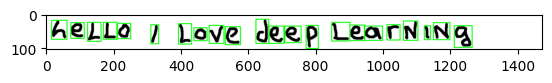

In [175]:
letter,image = get_letters("./9/train_v2/hello.png")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
JAFFEUX


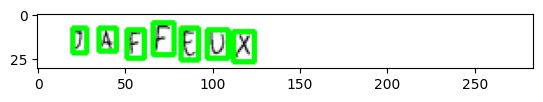

In [22]:
letter,image = get_letters("./9/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

## RNN Dataset Creation and Preprocessing

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, TimeDistributed

In [150]:
import os
import time
import pandas as pd

####################### Create dataset ############################
start_time = time.time()
handwritten_images_dir = "./9/train_v2/train/"
handwritten_labels_file = "./9/written_name_train_v2.csv"  # CSV file containing image_file and label columns

# Read the CSV file
handwritten_labels_df = pd.read_csv(handwritten_labels_file)
cnn_predictions = []
true_labels = []

# Limit the number of samples processed to 10000
limit = 10000

for idx, row in handwritten_labels_df.iterrows():
    if idx >= limit:
        break
    print(f"Processing image {idx}/{limit}")
    image_file = row["FILENAME"]
    label = row["IDENTITY"]
    image_path = os.path.join(handwritten_images_dir, image_file)
    if os.path.exists(image_path):
        letters, _ = get_letters(image_path)
        predicted_name = get_word(letters)
        print(f"Predicted name: {predicted_name}, True name: {label}")
        cnn_predictions.append(predicted_name)
        true_labels.append(label)
    else:
        print(f"No letters found for image {image_file}. Skipping...")


print(f"Created dataset with CNN predictions: {time.time() - start_time:.2f} seconds")

# Save predictions and true labels to a file for RNN training
start_time = time.time()
with open("cnn_predictions_2.txt", "w") as f:
    for pred, label in zip(cnn_predictions, true_labels):
        f.write(f"{pred}\t{label}\n")
print(f"Saved CNN predictions and true labels to file: {time.time() - start_time:.2f} seconds")

####################### Load and preprocess data for RNN ############################
start_time = time.time()
predictions = []
labels = []
with open("cnn_predictions_2.txt", "r") as f:
    for line in f:
        pred, label = line.strip().split("\t")
        predictions.append(pred)
        labels.append(label)
print(f"Loaded CNN predictions and true labels: {time.time() - start_time:.2f} seconds")

# Use only 7000 samples for training and 3000 for testing
train_size = 7000
test_size = 3000

train_predictions = predictions[:train_size]
train_labels = labels[:train_size]
test_predictions = predictions[train_size:train_size + test_size]
test_labels = labels[train_size:train_size + test_size]

# Tokenize the sequences
start_time = time.time()
tokenizer = Tokenizer(char_level=True)  # char_level=True to tokenize at character level
tokenizer.fit_on_texts(train_predictions + train_labels + test_predictions + test_labels)
print(f"Fitting tokenizer: {time.time() - start_time:.2f} seconds")

# Convert sequences to integers
start_time = time.time()
train_pred_sequences = tokenizer.texts_to_sequences(train_predictions)
train_label_sequences = tokenizer.texts_to_sequences(train_labels)
test_pred_sequences = tokenizer.texts_to_sequences(test_predictions)
test_label_sequences = tokenizer.texts_to_sequences(test_labels)
print(f"Converting sequences to integers: {time.time() - start_time:.2f} seconds")

# Pad the sequences
start_time = time.time()
max_seq_length = max(max(len(seq) for seq in train_pred_sequences + test_pred_sequences), max(len(seq) for seq in train_label_sequences + test_label_sequences))
train_pred_sequences = pad_sequences(train_pred_sequences, maxlen=max_seq_length, padding="post")
train_label_sequences = pad_sequences(train_label_sequences, maxlen=max_seq_length, padding="post")
test_pred_sequences = pad_sequences(test_pred_sequences, maxlen=max_seq_length, padding="post")
test_label_sequences = pad_sequences(test_label_sequences, maxlen=max_seq_length, padding="post")
print(f"Padding sequences: {time.time() - start_time:.2f} seconds")

# Convert labels to categorical
start_time = time.time()
num_classes = len(tokenizer.word_index) + 1  # +1 for padding
train_label_sequences = to_categorical(train_label_sequences, num_classes=num_classes)
test_label_sequences = to_categorical(test_label_sequences, num_classes=num_classes)
print(f"Converting labels to categorical: {time.time() - start_time:.2f} seconds")

Loaded CNN predictions and true labels: 0.01 seconds
Fitting tokenizer: 0.05 seconds
Converting sequences to integers: 0.04 seconds
Padding sequences: 0.05 seconds
Converting labels to categorical: 0.04 seconds
['BENES', 'LUCLE', 'EHHF', 'ELLISE', 'HONNILT', 'PAVLINE', 'ROMALN', 'CYLRLLELLE', 'LILOU', 'NLTHLEUX', 'THOMAS', 'HNALLS', 'JAFFEUX', 'PMREVOST', 'RMANE', 'BRUGERLE', 'LIORFNTLN', 'ELISA', 'MAUPAS', 'YETSLSA', 'XIILSTIU', 'ERNLLLL', 'AMBRLOLSE', 'ELWXXALI', 'DENZLNF', 'LAQWRRIERE', 'YAEL', 'VITREL', 'GUELLMGOGUW', 'NATHEC', 'WAL', 'VILTORIF', 'WLRBIEA', 'DUPRAT', 'LEBAQH', 'RCMI', 'ARGITXU', 'XCDKLILSUEY', 'HIZWLNE', 'ELLYISA', 'PAWOURIL', 'ADROGNE', 'JULIE', 'TROUVAY', 'CORALLIF', 'HVANDENAAEFLCI', 'ASHLEY', 'AHBROS', 'GAROT', 'HILIANIITHIM', 'THLLFFO', 'VILNLENT', 'LOUFS', 'VLERSTAWTE', 'LVCL', 'CLQLLO', 'COLLIU', 'FERON', 'WUHESNEL', 'BOVTET', 'BEKNARD', 'WNLAHW', 'CCSSA', 'AFLOELLL', 'MARTFNJL', 'WCOHHIER', 'GAPILSTE', 'SALDANI', 'VIUFOTAE', 'LULL', 'GARCIA', 'ALEXANDRE', '

## RNN Training

In [ ]:
####################### Train the RNN ############################
start_time = time.time()
embedding_dim = 50

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=num_classes, output_dim=embedding_dim, input_length=max_seq_length))
rnn_model.add(SimpleRNN(128, return_sequences=True))
rnn_model.add(TimeDistributed(Dense(num_classes, activation="softmax")))

rnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the RNN model
history = rnn_model.fit(train_pred_sequences, train_label_sequences, epochs=30, batch_size=32, validation_split=0.2)
print(f"Training RNN model: {time.time() - start_time:.2f} seconds")

# Evaluate the RNN model
start_time = time.time()
loss, accuracy = rnn_model.evaluate(test_pred_sequences, test_label_sequences)
print(f"Test accuracy: {accuracy}")
print(f"Evaluating RNN model: {time.time() - start_time:.2f} seconds")

# Save the RNN model
start_time = time.time()
rnn_model.save("typo_correction_rnn_base_nonums_2.h5")
print(f"Saved RNN model: {time.time() - start_time:.2f} seconds")

In [ ]:
# try the model passing a prediction of the CNN model

# Predict one sample with the CNN model: character_recognition_model_base_nonums_2.h5
letter,image = get_letters("./9/train_v2/hello.png")
word = get_word(letter)
print(word)
#plt.imshow(image)

# Now pass the prediction to the RNN model
# Load the RNN model
rnn_model = load_model("typo_correction_rnn_base_nonums_2.h5")

# Tokenize the sequence
pred_sequence = tokenizer.texts_to_sequences([word])
pred_sequence = pad_sequences(pred_sequence, maxlen=max_seq_length, padding="post")

# Predict the corrected sequence
corrected_sequence = rnn_model.predict(pred_sequence)
corrected_sequence = np.argmax(corrected_sequence, axis=-1)
corrected_sequence = " ".join(tokenizer.sequences_to_texts(corrected_sequence))
print(f"Corrected sequence: {corrected_sequence}")

